# Modeling Time Series Data 

**White Noise Model** The white noise model has three properties: Fixed and constant mean/variance; No correlation over time. Example: Gaussian white noise, where the constant mean is equal to zero, and the constant variance is equal to 1.

**Random Walk Model** As opposed to the white noise model, the random walk model, however, has No Specified Mean/Variance; Strong Dependence over time; (Very common in Finance like exchange rate)

## Correlation and Autocorrelation in Time Series

**Autocorrelation:** It helps us study how each time series observation is related to its recent (or not so recent) past. Processes with greater autocorrelation are more predictable than those without any form of autocorrelation.

**The Autocorrelation Function:** The autocorrelation function is a function that represents autocorrelation of a time series as a function of the time lag. The autocorrelation function tells interesting stories about trends and seasonality. For example, if the original time series repeats itself every five days, you would expect to see a spike in the autocorrelation function at 5 days.

**Partial Autocorrelation Function** (or PACF) gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags (unlike the autocorrelation function, which does not control for other lags). PACF can be thought of as a summary of the relationship between a time series element with observations at a lag, *with the relationships of intervening observations removed*.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gtrends = pd.read_csv('google_trends.csv', skiprows=1)
gtrends.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,47
1,2004-02,77,27,49
2,2004-03,75,25,47
3,2004-04,73,24,47
4,2004-05,75,23,44


In [3]:
gtrends.columns = ['Month', 'Diet', 'Gym', 'Finance']
gtrends['Month'] = pd.to_datetime(gtrends['Month'])
gtrends.set_index('Month', inplace=True)

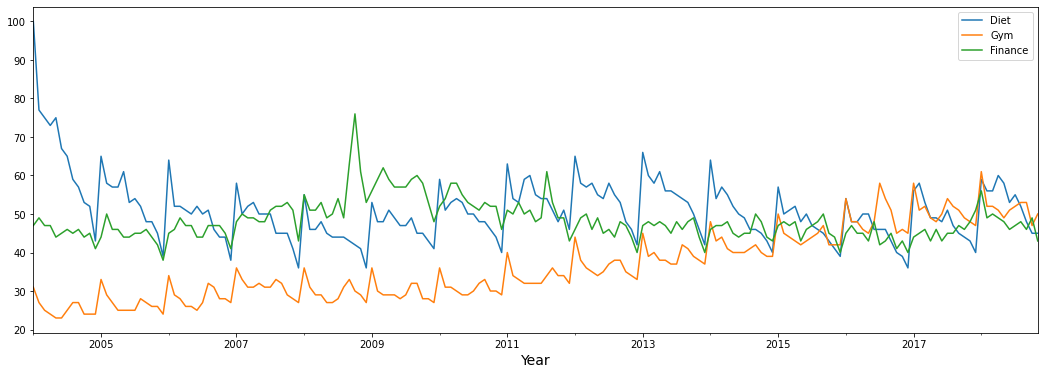

In [4]:
gtrends.plot(figsize=(18,6))
plt.xlabel('Year', fontsize=14);

These time series seem to exhibit some seasonality as well. Do you see what's happening? Especially for "Diet" and "Gym" there seems to be a peak in the beginning of each year. The famous New Year's Resolutions!

Not surprisingly, these two seem to move in similar directions at same times as well. We can use the `.corr()` method to formally find the correlation measure:

In [5]:
gtrends.corr()

,Diet,Gym,Finance
Diet,1.000000,-0.050934,-0.026604
Gym,-0.050934,1.000000,-0.223186
Finance,-0.026604,-0.223186,1.000000


In [6]:
# differencing time series and then calculate the correlation again!
gtrends_diff = gtrends.diff(periods=1)

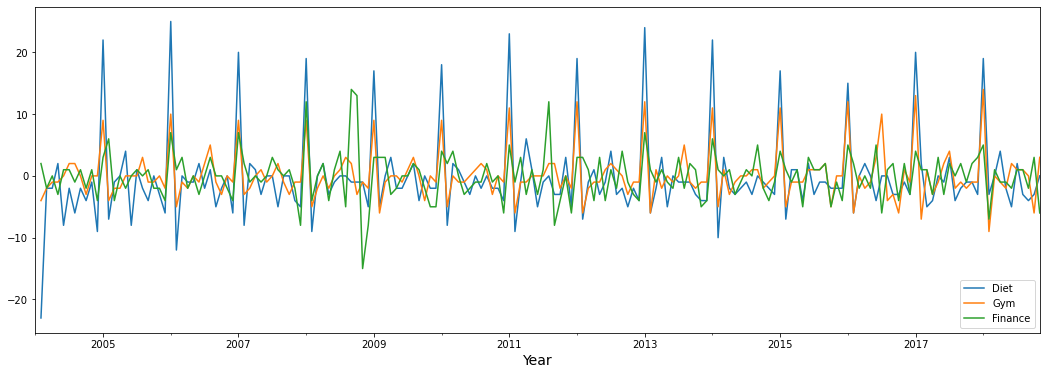

In [7]:
gtrends_diff.plot(figsize=(18,6))
plt.xlabel('Year', fontsize=14);

In [8]:
gtrends_diff.corr()

,Diet,Gym,Finance
Diet,1.000000,0.793339,0.395105
Gym,0.793339,1.000000,0.341564
Finance,0.395105,0.341564,1.000000


The spikes at the beginning of the year are a form of **seasonality**. By using 1-lag differencing we eliminated the simple trend, without getting rid of the seasonality. The trend "confused" the correlation coefficient, but after differencing, the correlation is very apparent.

**Autocorrelation** Let's start with comparing the time series of the keyword "Diet", with the time series with a lag of one. What we're essentially doing is comparing each value in the time series with it's previous value (in case of the "Diet" series, with the value in the previous month). This is called "lag 1 autocorrelation".

We will use the `.shift()` method in pandas to shift the index forward, or backward.

In [9]:
diet = gtrends[['Diet']]

In [10]:
diet_shift_1 = diet.shift(periods=1)
diet_shift_1

,Diet
Month,
2004-01-01,NaN
2004-02-01,100.0
2004-03-01,77.0
2004-04-01,75.0
2004-05-01,73.0
...,...
2018-07-01,53.0
2018-08-01,55.0
2018-09-01,52.0


In [11]:
lag_1 = pd.concat([diet_shift_1, diet], axis=1)
lag_1.corr()

,Diet,Diet
Diet,1.000000,0.624862
Diet,0.624862,1.000000


You can see that the "lag 1 autocorrelation" is 0.62. Let's plot them together to get a sense of what's happening:

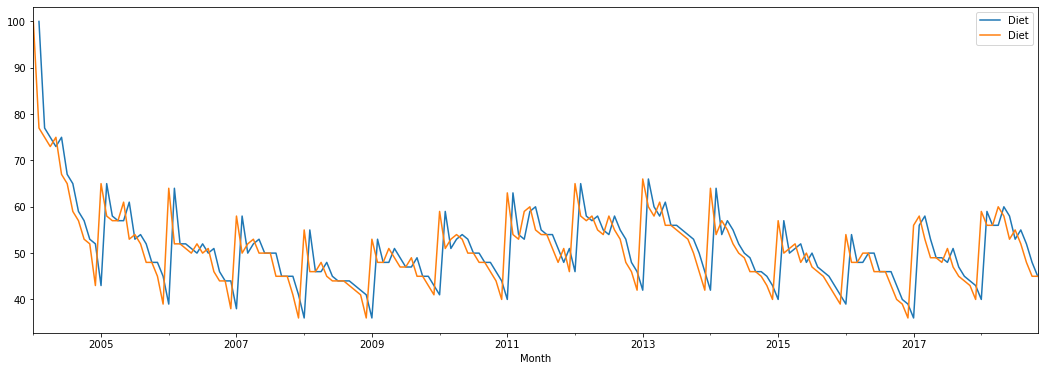

In [12]:
lag_1.plot(figsize=(18,6));

In [13]:
#Let's look at lag 2
diet_shift_2 = diet.shift(periods=2)
lag_2 = pd.concat([diet_shift_2, diet], axis=1)
lag_2.corr()

,Diet,Diet
Diet,1.000000,0.537913
Diet,0.537913,1.000000


The "lag 2 autocorrelation" is 0.54, so a little lower than the "lag 1 autocorrelation".

Now, how about a lag 12 autocorrelation?

In [14]:
diet_shift_12 = diet.shift(periods=12)
lag_12 = pd.concat([diet_shift_12, diet], axis=1)
lag_12.corr()

,Diet,Diet
Diet,1.000000,0.754955
Diet,0.754955,1.000000


Unsurprisingly, this autocorrelation is high! We're basically comparing the series by shifting our data by 1 year, so January 2004 is compared to January 2005, and so on. Let's visualize these series and the 12-lag shifted series as well.

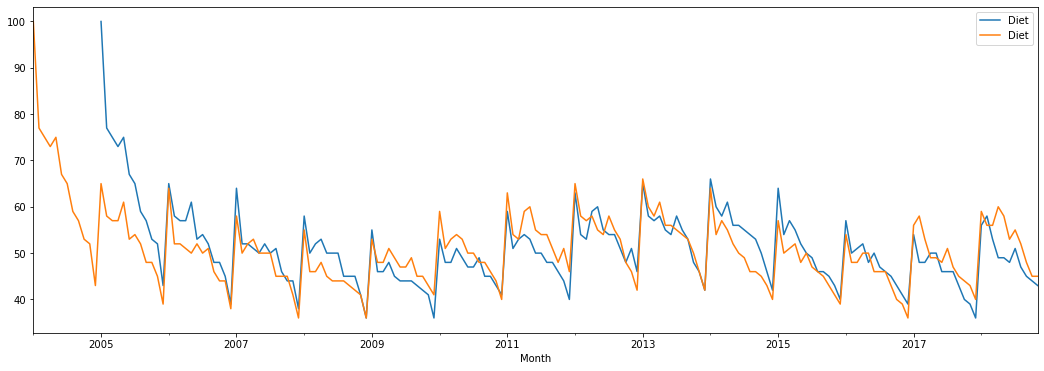

In [15]:
lag_12.plot(figsize=(18,6));

Ploting autocorrelation function, You can use the `autocorrelation_plot()` function in Pandas' `plotting` module.

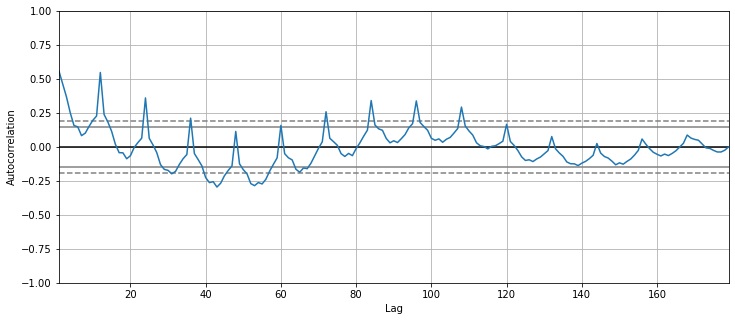

In [16]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(diet);

Look at that, you can clearly identify spikes for lags of multiples of 12. The dotted lines in the plot tell you about the statistical significance of the correlation. For this time series, you can say that "Diet" is definitely autocorrelated for lags of twelve months and 24 months, but for some later lags the result is not significant.

Like before, instead of plotting the autocorrelation function for the "Diet" series as is, we can also plot the autocorrelation function for the differenced series. Let's see how that changes our result.

In [17]:
diet_diff = gtrends_diff[['Diet']].dropna()

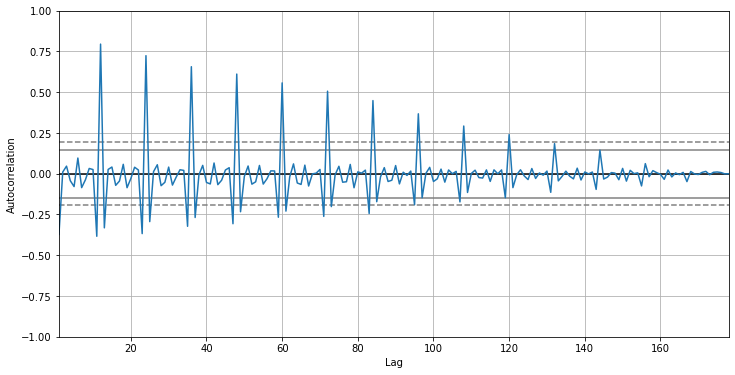

In [18]:
plt.figure(figsize=(12,6))
pd.plotting.autocorrelation_plot(diet_diff);

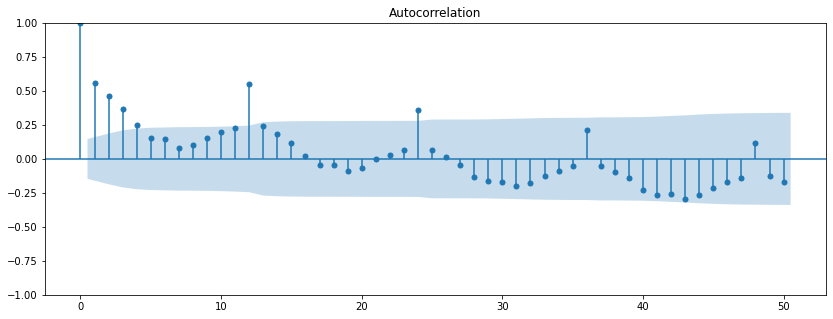

In [19]:
#Plotiing ACF using statsmodel
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_acf(diet, lags=50);

You can see that the ACF here seems a little more *stable*, revolving around 0, which is no surprise. Additionally, the autocorrelation for multiples of 12 seems consistently statistically significant, while it decays for longer time lags!

**PACF**: Let's plot the partial autocorrelation function of our "Diet" series. Although Pandas doesn't have a partial autocorrelation function, but luckily, `statsmodels` has one in its `tsaplots` module! 

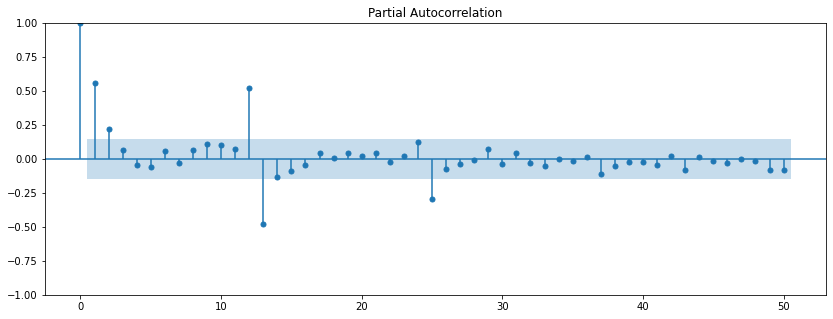

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5
plot_pacf(diet, lags=50);

The partial autocorrelation function can be interpreted as a regression of the series against its past lags. It helps you come up with a possible order for the auto regressive term. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

### Exchange Rate Dataset (ACF & PACF)

In [21]:
# Import all packages and functions
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

In [22]:
# Import data
xr = pd.read_csv('exch_rates.csv')

# Change the data type of the 'Frequency' column 
xr['Frequency'] = pd.to_datetime(xr['Frequency'])

# Set the 'Frequency' column as the index
xr.set_index('Frequency', inplace=True)

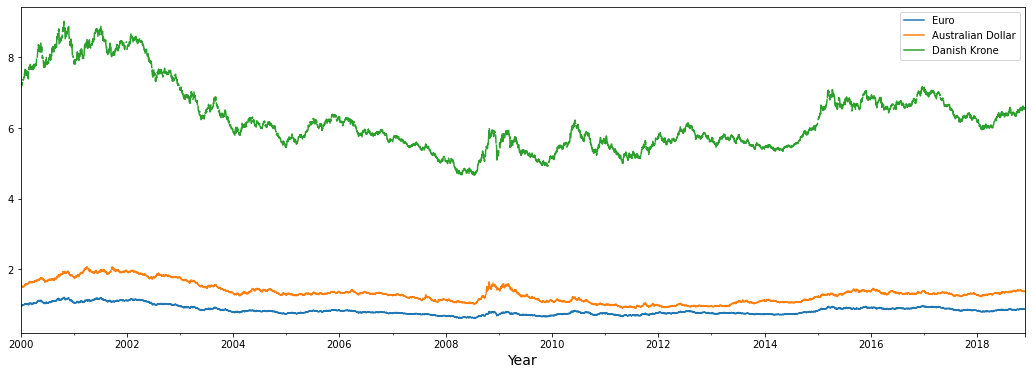

In [23]:
# Plot all rates on the same graph
xr.plot(figsize=(18,6))
plt.xlabel('Year', fontsize=14);

> **You can see that the EUR/USD and AUD/USD exchange rates are somewhere between 0.5 and 2, whereas the Danish Krone is somewhere between 4.5 and 9. Now let's look at the correlations between these time series.**

In [24]:
# Correlation
xr.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


> The exchange rates for Euro and the Australian dollar are highly correlated, but there are differences. 

> The Euro and the Danish Krone, however, is perfectly correlated. If you do further research you'll notice that the Danish Krone is pegged to the Euro, which means that they are basically designed to perfectly correlate together! 

> The fact that the value is just very, very close to 1 is due to rounding errors. Usually when the correlation is so close to 1 (or -1), it's too good to be true. So make sure you always dig deeper to correctly understand and interpret these numbers.

Next, look at the plots of the differenced (1-lag) series. Use subplots to plot them rather than creating just one plot.

In [25]:
# 1-lag differenced series 
xr_diff = xr.diff(periods=1)

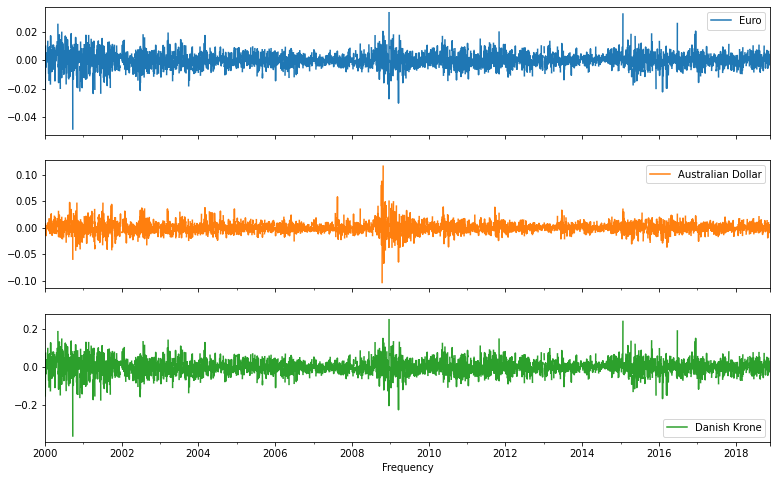

In [26]:
# Plot
xr_diff.plot(figsize=(13,8), subplots=True, legend=True);

In [27]:
# Correlation of the differenced timeseries
xr_diff.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.545369,0.999667
Australian Dollar,0.545369,1.000000,0.545133
Danish Krone,0.999667,0.545133,1.000000


> Differencing the series here led to a decrease in correlation between the EUR/USD and AUD/USD series. Differencing led to an increase in correlation between series, here the series are moving in (more or less) the same direction on a day-to-day basis and seasonality is not present, hence this result.

Next, let's look at the "lag-1 autocorrelation" for the EUR/USD exchange rate.

In [28]:
# Isolate the EUR/USD exchange rate
eur = xr[['Euro']]

# "Shift" the time series by one period
eur_shift_1 = eur.shift(periods=1)

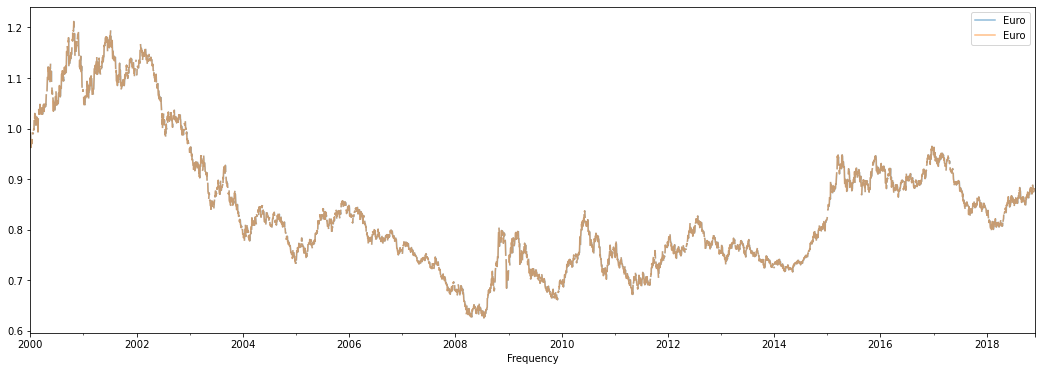

In [29]:
# Combine the original and shifted time series
lag_1 = pd.concat([eur_shift_1, eur], axis=1)

# Plot
lag_1.plot(figsize=(18,6), alpha=0.5);

In [30]:
# Correlation
lag_1.corr()

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


Repeat this for a "lag-50 autocorrelation".

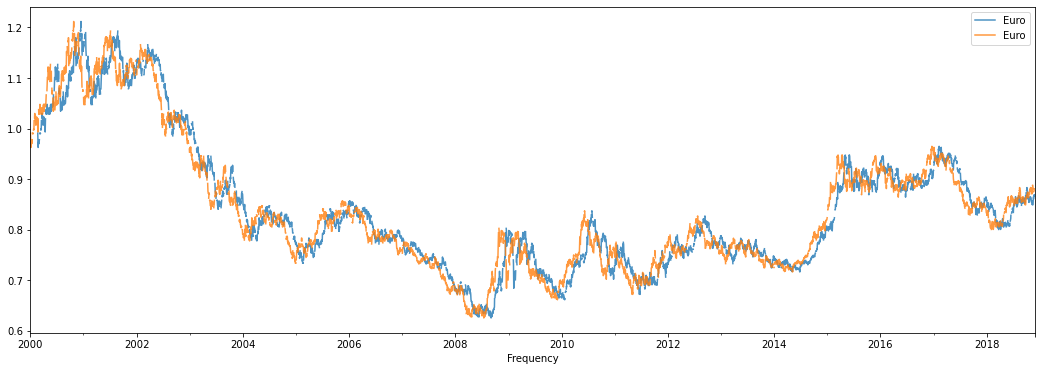

In [31]:
# "Shift" the time series by 50 periods
eur_shift_50 = eur.shift(periods=50)

# Combine the original and shifted time series
lag_50 = pd.concat([eur_shift_50, eur], axis=1)

# Plot
lag_50.plot(figsize=(18,6), alpha=0.8);

In [32]:
# Correlation
lag_50.corr()

,Euro,Euro
Euro,1.000000,0.968321
Euro,0.968321,1.000000


> Autocorrelation is very high in these time series, even up to a lag as big as 50! This is no big surprise though: remember that these are random walk series, which are highly recursive, as each value depends heavily on the previous one!

Knowing this, let's plot the ACF now.

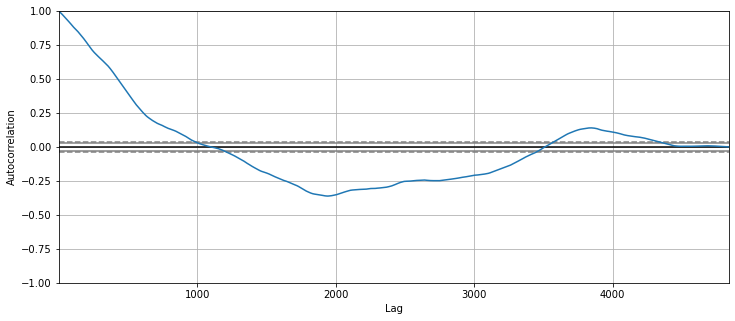

In [33]:
# ACF Plot
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(eur.dropna());

> The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the partial autocorrelation function plot.

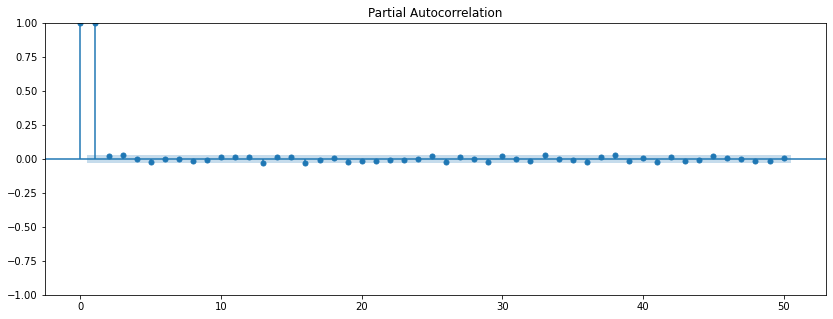

In [34]:
# PACF Plot
rcParams['figure.figsize'] = 14, 5
plot_pacf(eur.dropna(), lags=50);

> Partial Autocorrelation Function gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for random walk series!

## The Airpassenger Dataset (ACF & PACF)

In [35]:
# Import and process the air passenger data
air = pd.read_csv('passengers.csv')
air['Month'] = pd.to_datetime(air['Month'])
air.set_index('Month', inplace=True)
air

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


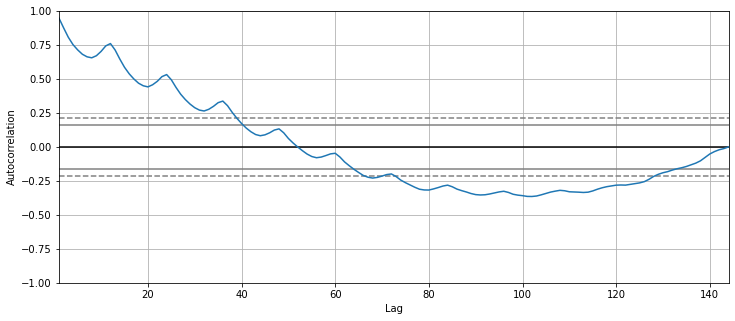

In [36]:
# Plot ACF (regular)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(air);

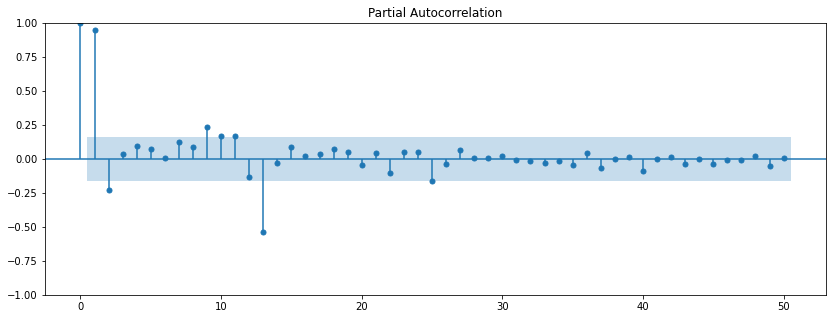

In [37]:
# Plot PACF (regular)
rcParams['figure.figsize'] = 14, 5
plot_pacf(air.dropna(), lags=50, method='ywm');

In [38]:
# Generate a differenced series
air_diff = air.diff(periods=1)

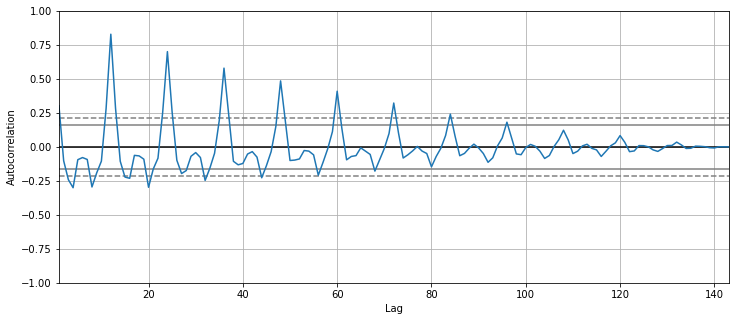

In [39]:
# Plot ACF (differenced)
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(air_diff.dropna());

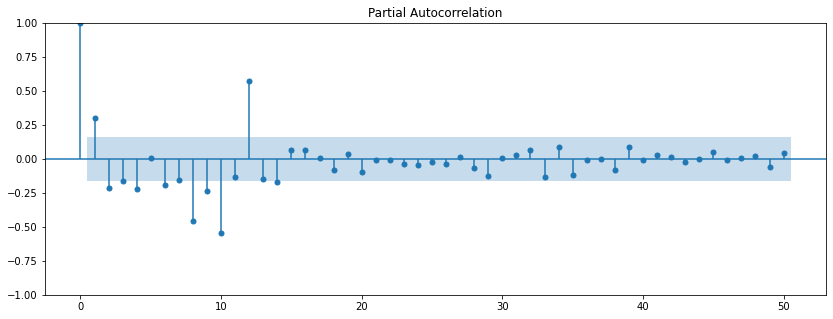

In [40]:
# Plot PACF (differenced)
rcParams['figure.figsize'] = 14, 5
plot_pacf(air_diff.dropna(), lags=50, method='ywm');

> The seasonality is much more clear in the differenced time series. The PACF has just one very strong correlation, right at 12 months.

## The NYSE Dataset (ACF & PACF)

In [41]:
# Import and process the NYSE data
nyse = pd.read_csv('NYSE_monthly.csv') 
nyse['Month'] = pd.to_datetime(nyse['Month'])
nyse.set_index('Month', inplace=True)
nyse

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042
...,...
1966-08-01,-0.030
1966-09-01,-0.014
1966-10-01,0.013


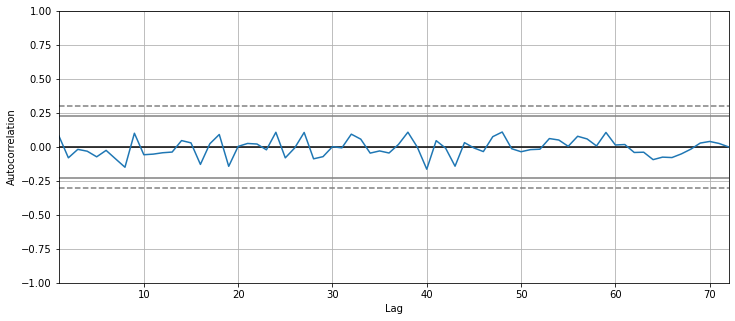

In [42]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(nyse.dropna());

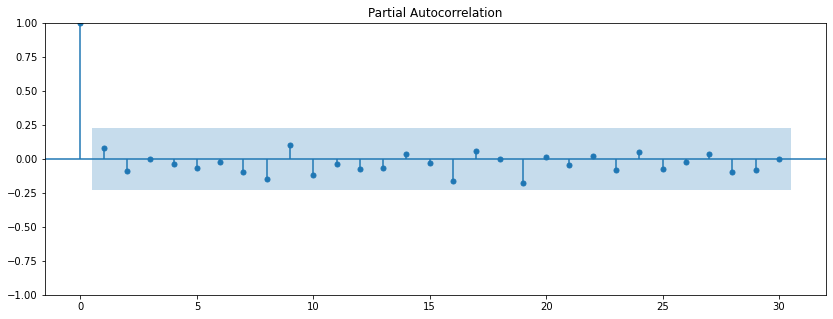

In [43]:
rcParams['figure.figsize'] = 14, 5
plot_pacf(nyse, lags=30, method='ywm');

> Autocorrelations and partial autocorrelations are virtually 0 for any lag. This is no surprise! The NYSE series was a white noise series, meaning there is no trend or no seasonality! This is, again, a typical result for these kind of series.

## Modeling with Autoregressive and Moving Average Models
### Generate a first order AR mode -  AR(1)

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(11225)

# Create a series with the specified dates
dates = pd.date_range('2017-01-01', '2018-03-31')

We will generate a first order AR model with $\phi = 0.7$ , $\mu=5$ , and $Y_0= 8$. 

In [45]:
error = np.random.normal(0, 2, len(dates))
Y_0 = 8
mu = 5
phi = 0.7

In [46]:
TS = [None] * len(dates)
y = Y_0
for i, row in enumerate(dates):
    TS[i] = mu + y * phi + error[i]
    y = TS[i] - mu

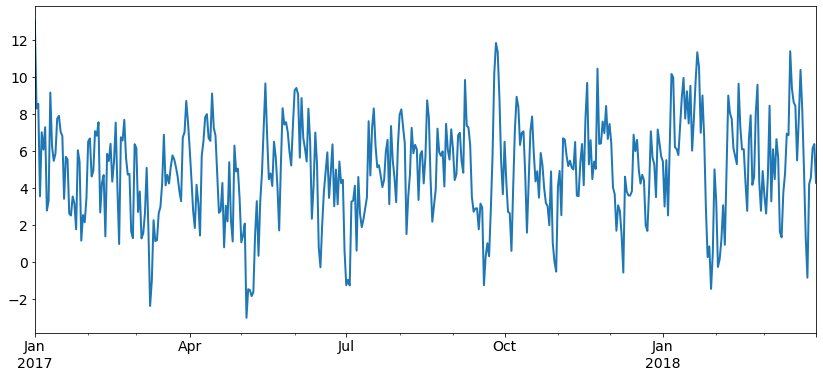

In [47]:
#Plotting our series
series = pd.Series(TS, index=dates)
series.plot(figsize=(14,6), linewidth=2, fontsize=14);

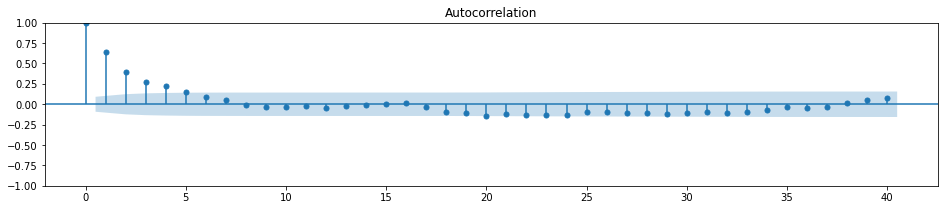

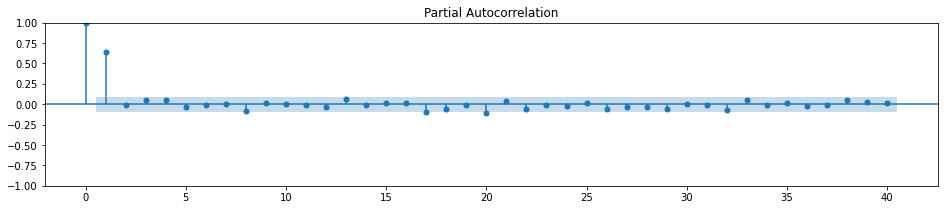

In [48]:
#Checking the ACF and PACF of the model
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series, ax=ax, lags=40);

In [49]:
#First order AR Model (1,0,0) - AR(1)

# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arma = ARIMA(series, order=(1,0,0))

In [50]:
# Fit the model to data
res_arma = mod_arma.fit()

In [51]:
# Print out summary information on the fit
print(res_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  455
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -968.698
Date:                Tue, 28 Nov 2023   AIC                           1943.395
Time:                        13:59:39   BIC                           1955.756
Sample:                    01-01-2017   HQIC                          1948.265
                         - 03-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9664      0.262     18.937      0.000       4.452       5.480
ar.L1          0.6474      0.036     18.108      0.000       0.577       0.718
sigma2         4.1327      0.289     14.289      0.0

Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect. You can use the `.params` attribute to check these values. 

In [52]:
# Print out the estimate for the constant and for theta
print(res_arma.params)

const     4.966442
ar.L1     0.647429
sigma2    4.132665
dtype: float64


## Generate a first order MA mode - MA(1)

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

In [53]:
np.random.seed(1234)

# Create a series with the specified dates
dates = pd.date_range('2015-04-01', '2015-08-31')

error = np.random.normal(0, 4, len(dates))
mu = 7
theta = 0.9

TS = [None] * len(dates)
error_prev = error[0]
for i, row in enumerate(dates):
    TS[i] = mu + theta * error_prev + error[i]
    error_prev = error[i]

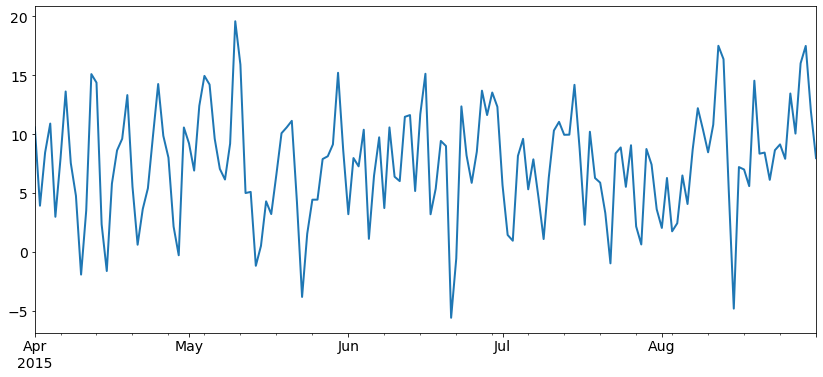

In [54]:
series = pd.Series(TS, index=dates)
series.plot(figsize=(14,6), linewidth=2, fontsize=14);

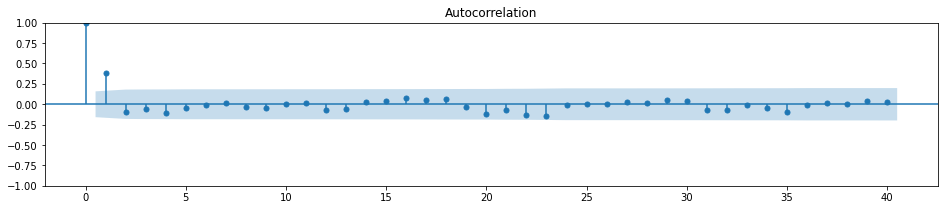

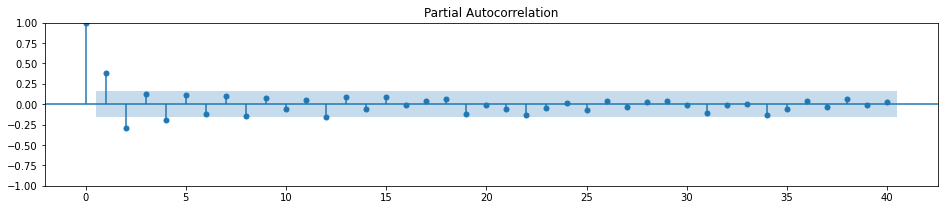

In [55]:
#Plot ACF & PACF
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(series, ax=ax, lags=40);

fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(series, ax=ax, lags=40);

In [56]:
#First order MA Model (0,1)
# Instantiate and fit an MA(1) model to the simulated data
mod_arma = ARIMA(series, order=(0,0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

print("-------------------------------------------------------------------------------------")

# Print out the estimate for the constant and for theta
print(res_arma.params)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  153
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -426.378
Date:                Tue, 28 Nov 2023   AIC                            858.757
Time:                        13:59:45   BIC                            867.848
Sample:                    04-01-2015   HQIC                           862.450
                         - 08-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.5373      0.625     12.069      0.000       6.313       8.761
ma.L1          0.8727      0.047     18.489      0.000       0.780       0.965
sigma2        15.2765      1.592      9.597      0.0

## 400M Olympics Winning Times Dataset

In [57]:
#Loading libraries & dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

data = pd.read_csv("winning_400m.csv")
data["year"] = pd.to_datetime(data["year"].astype(str))
data.set_index("year", inplace=True)
data.index = data.index.to_period("Y")

In [58]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


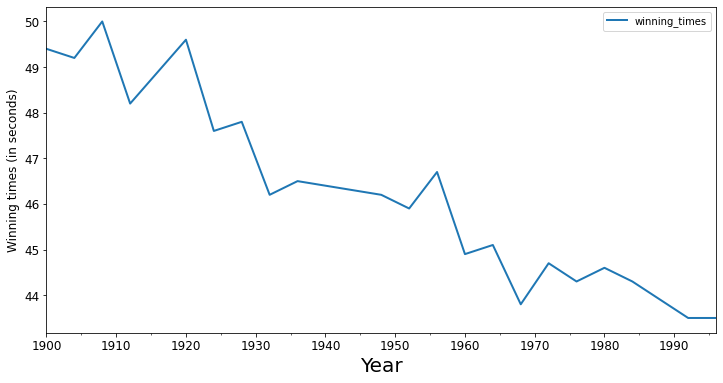

In [59]:
# Plot the time series
data.plot(figsize=(12, 6), linewidth=2, fontsize=12)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Winning times (in seconds)", fontsize=12);

In [60]:
# Difference the time series
data_diff = data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


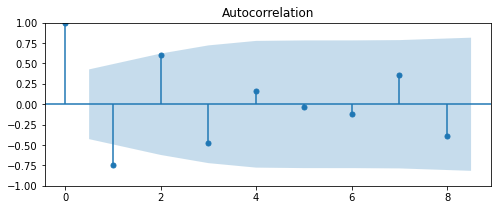

In [61]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(data_diff, ax=ax, lags=8);

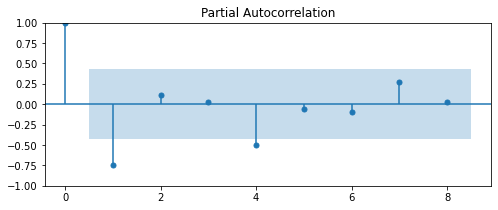

In [62]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(8, 3))
plot_pacf(data_diff, ax=ax, lags=8, method="ywm");

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [63]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARMA(1,0) model
mod_arma = ARIMA(data_diff, order=(1, 0, 0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

print("-------------------------------------------------------------------------------------")

# Print out the estimate for the constant and for theta
print('estimate for the constant and for theta')
print(res_arma.params)

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -20.054
Date:                Tue, 28 Nov 2023   AIC                             46.107
Time:                        13:59:53   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2885      0.081     -3.559      0.000      -0.447      -0.130
ar.L1         -0.7186      0.144     -5.005      0.000      -1.000      -0.437
sigma2         0.3819      0.180      2.121      0.0

In [64]:
# Fit an ARMA(2,1) model
mod_arma = ARIMA(data_diff, order=(2, 0, 1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print('estimate for the constant and for theta')
print(res_arma.params)

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -19.931
Date:                Tue, 28 Nov 2023   AIC                             49.862
Time:                        13:59:54   BIC                             55.084
Sample:                    12-31-1904   HQIC                            50.995
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2834      0.092     -3.079      0.002      -0.464      -0.103
ar.L1         -0.6102      2.583     -0.236      0.813      -5.673       4.453
ar.L2          0.1280      1.848      0.069      0.9

In [65]:
# Fit an ARMA(2,2) model
mod_arma = ARIMA(data_diff, order=(2, 0, 2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print('estimate for the constant and for theta')
print(res_arma.params)

                               SARIMAX Results                                
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -16.472
Date:                Tue, 28 Nov 2023   AIC                             44.943
Time:                        13:59:55   BIC                             51.210
Sample:                    12-31-1904   HQIC                            46.303
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2717      0.103     -2.629      0.009      -0.474      -0.069
ar.L1         -1.7573      0.117    -14.991      0.000      -1.987      -1.528
ar.L2         -0.9179      0.120     -7.664      0.0

> ARMA(1,0), ARMA(2,2) and ARMA(2,1) all seem to have decent fits with significant parameters. 

> Depending on whether you pick AIC or BIC as a model selection criterion, your result may vary.

> In this situation, you'd generally go for a model with fewer parameters,so ARMA(1,0) seems fine.

> Note that we have a relatively short time series, which can lead to a more difficult model selection process.

# Implementing a seasonal ARIMA

**Dataset:** "Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.," which collected CO2 samples from March 1958 to December 2001.

In [66]:
# Import necessary libraries
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
plt.style.use('ggplot')

In [67]:
# Load the dataset
dataset = sm.datasets.co2.load().data

# Convert into DataFrame
df = pd.DataFrame(dataset)

In [68]:
# Make sure that index is DatetimeIndex named "date"
if isinstance(df.index, pd.DatetimeIndex):
    df.index.name = 'date'
else:
    df.rename(columns={'index':'date'}, inplace=True)
    df.set_index('date', inplace=True)
    
df

,co2
date,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2


In [69]:
df = df.asfreq('W-SAT')

# The 'MS' string groups the data in buckets by start of the month
CO2 = df['co2'].resample('MS').mean()

CO2

date
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

In [70]:
# The term bfill means that we use the value before filling in missing values
CO2 = CO2.fillna(CO2.bfill())
CO2

date
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

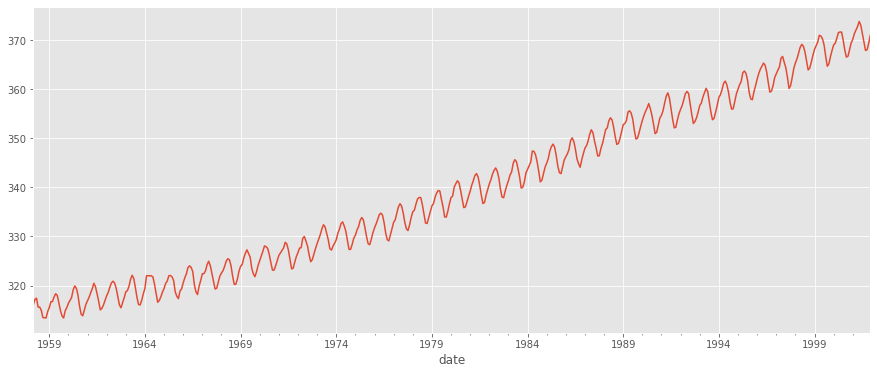

date
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64


In [71]:
# Plot the time series
CO2.plot(figsize=(15, 6))
plt.show()
print(CO2.head())

> As noted earlier, the time series has spikes reflecting an obvious seasonality pattern, as well as an overall increasing trend.

Parameter Selection for the ARIMA Time Series Model: The first step towards fitting an ARIMA model is to find the values of `ARIMA(p,d,q)(P,D,Q)s` that produce the desired output. Selection of these parameters requires domain expertise and time.  We shall first generate small ranges of these parameters and use a "grid search" to iteratively explore different combinations of parameters. For each combination of parameters, we fit a new seasonal ARIMA model with the `SARIMAX()` function from the `statsmodels` library and assess its overall quality. 

In [72]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

**AIC (Akaike Information Criterion) as Regularization Measure** For evaluating the model, we shall use the AIC (Akaike Information Criterion) value, which is provided by ARIMA models fitted using `statsmodels` library. The Akaike information criterion (AIC) is an estimator of the relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

A model that fits the data very well while using lots of features will be assigned a larger AIC score than a model that uses fewer features to achieve the same goodness-of-fit. Therefore, we are interested in finding the model that yields the lowest AIC value. 

In [73]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(CO2,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}: AIC Calculated={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12): AIC Calculated=7612.583429881011
ARIMA (0, 0, 0) x (0, 0, 1, 12): AIC Calculated=6787.343624034645
ARIMA (0, 0, 0) x (0, 1, 0, 12): AIC Calculated=1854.8282341411787
ARIMA (0, 0, 0) x (0, 1, 1, 12): AIC Calculated=1596.7111727637605
ARIMA (0, 0, 0) x (1, 0, 0, 12): AIC Calculated=1058.938892132006
ARIMA (0, 0, 0) x (1, 0, 1, 12): AIC Calculated=1056.2878509830045
ARIMA (0, 0, 0) x (1, 1, 0, 12): AIC Calculated=1361.65789780683
ARIMA (0, 0, 0) x (1, 1, 1, 12): AIC Calculated=1044.7647912967827
ARIMA (0, 0, 1) x (0, 0, 0, 12): AIC Calculated=6881.048754477874
ARIMA (0, 0, 1) x (0, 0, 1, 12): AIC Calculated=6072.6623277164
ARIMA (0, 0, 1) x (0, 1, 0, 12): AIC Calculated=1379.194106742114
ARIMA (0, 0, 1) x (0, 1, 1, 12): AIC Calculated=1241.4174716850443
ARIMA (0, 0, 1) x (1, 0, 0, 12): AIC Calculated=1108.2514432519338
ARIMA (0, 0, 1) x (1, 0, 1, 12): AIC Calculated=828.5619483848302
ARIMA (0, 0, 1) x (1, 1, 0, 12): AIC Calculated=1119.5957893604718
ARIMA 

In [74]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (1, 1, 1)
pdqs    (1, 1, 1, 12)
aic         277.78022
Name: 63, dtype: object

> The output of our code suggests that `ARIMA (1, 1, 1) x (1, 1, 1, 12)` yields the lowest AIC value of `277.78`. We should therefore consider this to be optimal option out of all the models we have considered.

**Fitting an ARIMA Time Series Model** Using grid search, we have identified the set of parameters that produces the best fitting model to our time series data. We can proceed to analyze this particular model in more depth.

We'll start by plugging the optimal parameter values into a new SARIMAX model.

In [75]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(CO2, 
                                        order=(1, 1, 1), 
                                        seasonal_order=(1, 1, 1, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                co2   No. Observations:                  526
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -133.890
Date:                            Tue, 28 Nov 2023   AIC                            277.780
Time:                                    14:00:42   BIC                            298.843
Sample:                                03-01-1958   HQIC                           286.046
                                     - 12-01-2001                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.442      0.001       0.137       0.499
ma.L1         -0.6254      0.077   

The model returns a lot of information, but we'll focus only on the table of coefficients. The `coef` column above shows the importance of each feature and how each one impacts the time series patterns.  The $P>|z|$ provides  the significance of each feature weight. 

For our time-series, we see that each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

Next, we shall run model diagnostics to ensure that none of the assumptions made by the model have been violated. 

Call the `.plot_diagnostics()` method on ARIMA output below:

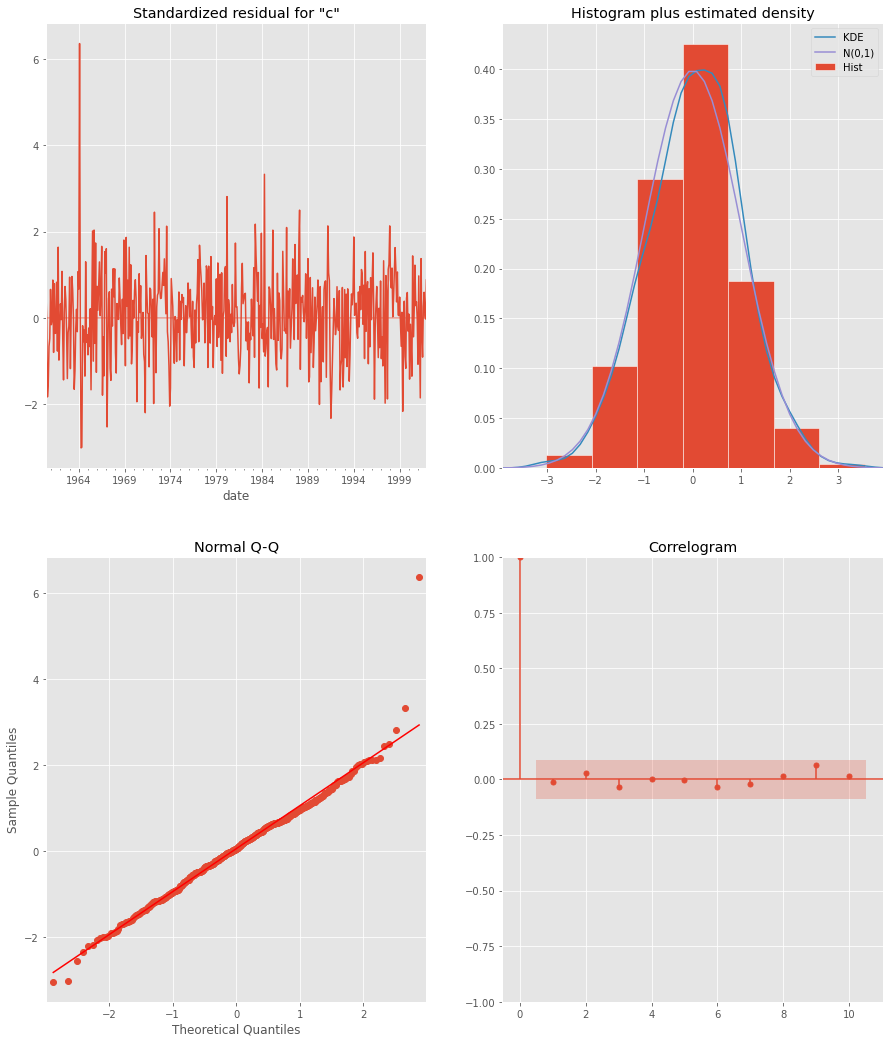

In [76]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

The purpose here is to ensure that residuals remain uncorrelated, normally distributed having zero mean. In the absence of these assumptions, we can not move forward and need further tweaking of the model. 

Let's check for these assumptions from diagnostics plots.

* In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). This is a good indication that the residuals are normally distributed.

* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) follows the linear trend of the samples taken from a standard normal distribution with N(0, 1). Again, this is a strong indication that the residuals are normally distributed.

* The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

These observations lead us to conclude that our model has no correlations and provides a satisfactory fit to help forecast future values.

In [77]:
#One-Step Ahead Forecasting
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_conf = pred.conf_int()

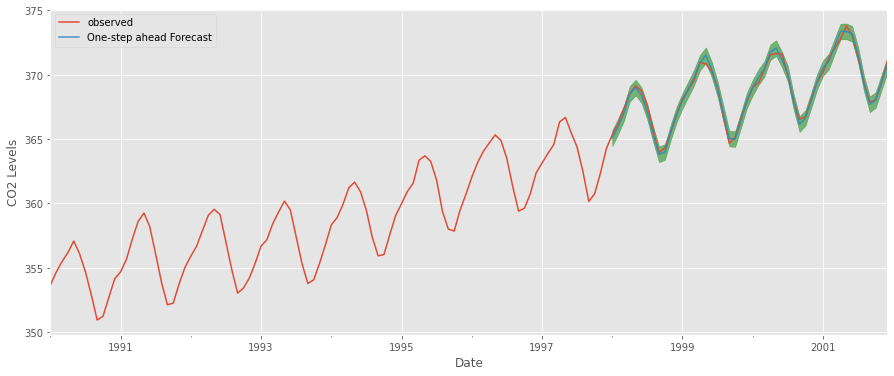

In [78]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = CO2['1990':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

The forecasts align with the true values  as seen above, with overall increase trend. We shall also check for the accuracy of our forecasts using  **MSE (Mean Squared Error)**. This will provide us with the average error of our forecasts. For each predicted value, we compute its distance to the true value and square the result. The results need to be squared so that positive/negative differences do not cancel each other out when we compute the overall mean.

In [79]:
# Get the real and predicted values
CO2_forecasted = pred.predicted_mean
CO2_truth = CO2['1998-01-01':]

# Compute the mean square error
mse = ((CO2_forecasted - CO2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


> The MSE of our one-step ahead forecasts yields a value of 0.07, which is very low. An MSE this close to 0 indicates that the estimator is predicting observations of the parameter with perfect accuracy, which would be an ideal scenario but it is not typically possible.

In [80]:
#Dynamic Forecasting
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

C:\Users\msagu\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['full_results']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


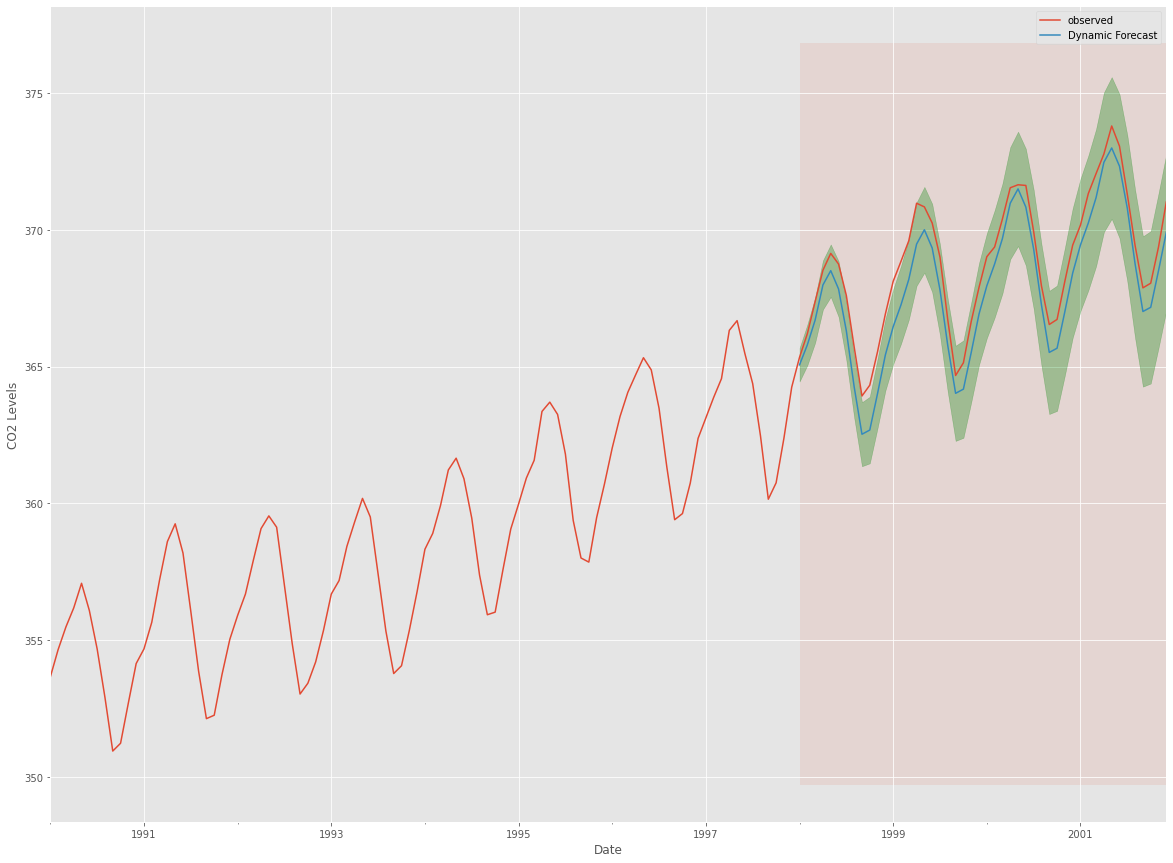

In [81]:
# Plot the dynamic forecast with confidence intervals.

ax = CO2['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), CO2_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

Once again, we quantify the predictive performance of our forecasts by computing the MSE.

In [82]:
# Extract the predicted and true values of our time series
CO2_forecasted = pred_dynamic.predicted_mean
CO2_truth = CO2['1998-01-01':]

# Compute the mean square error
mse = ((CO2_forecasted - CO2_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


> The predicted values obtained from the dynamic forecasts yield an MSE of 1.01. This is slightly higher than the one-step ahead, which is to be expected given that we are relying on less historical data from the time series.

> Both the one-step ahead and dynamic forecasts confirm that this time series model is valid. However, much of the interest around time series forecasting is the ability to forecast future values way ahead in time.

**Producing & Visualizing Forecast** We will now describe how to leverage our seasonal ARIMA time series model to forecast future values. The `.get_forecast()` method of our time series output can compute forecasted values for a specified number of steps ahead.

In [83]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

We can use the output of this code to plot the time series and forecasts of its future values.

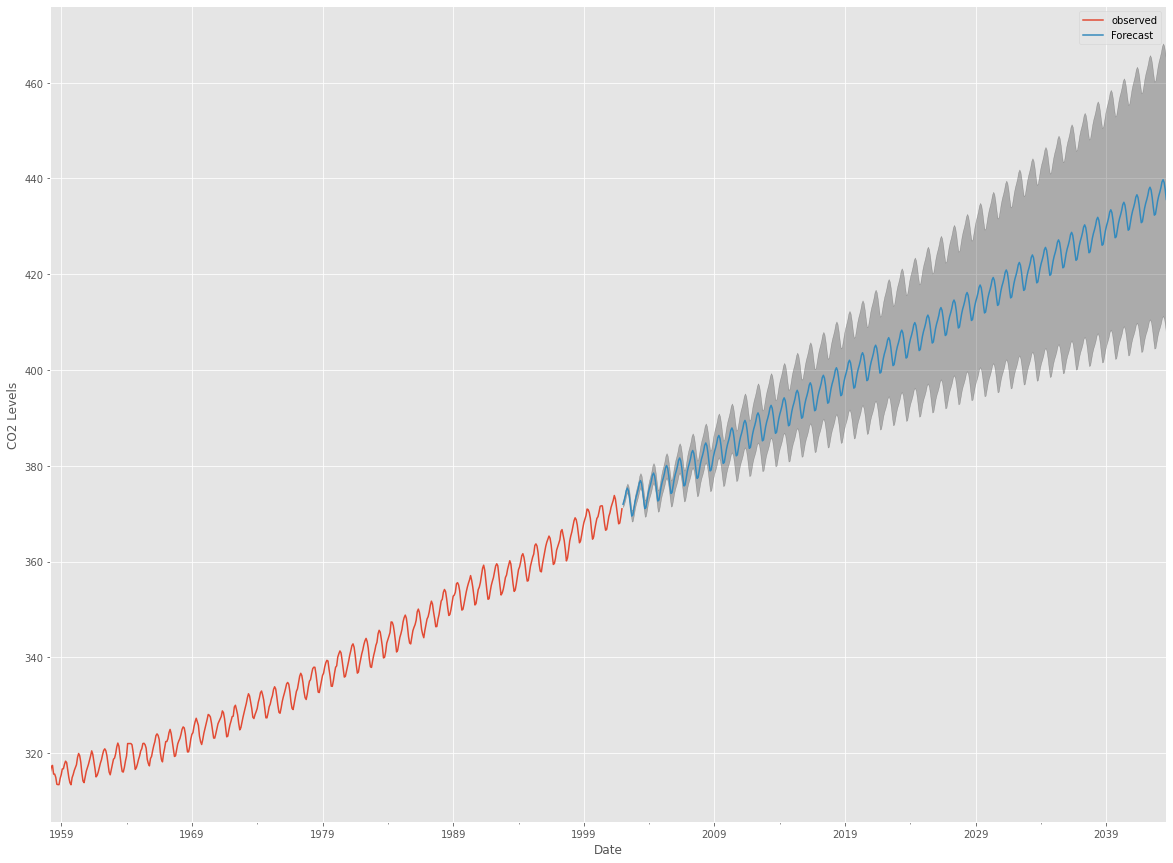

In [84]:
# Plot future predictions with confidence intervals
ax = CO2.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

Both the forecasts and associated confidence interval that we have generated can now be used to further understand the time series and foresee what to expect. Our forecasts show that the time series is expected to continue increasing at a steady pace.

As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future. 

## Model a time series using the Facebook's Prophet

In [85]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
plt.style.use('fivethirtyeight')

from prophet import Prophet

In [86]:
# Import passengers.csv and set it as a time series
ts = pd.read_csv('passengers.csv')
ts['Month'] = pd.DatetimeIndex(ts['Month'])

The `prophet` library also imposes the strict condition that the input columns be named `ds` (the time column) and `y` (the metric column), so let's rename the columns in our `ts` DataFrame. 

In [87]:
# Rename the columns [Month, AirPassengers] to [ds, y]
ts = ts.rename(columns={'Month': 'ds',
                        '#Passengers': 'y'})
ts

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


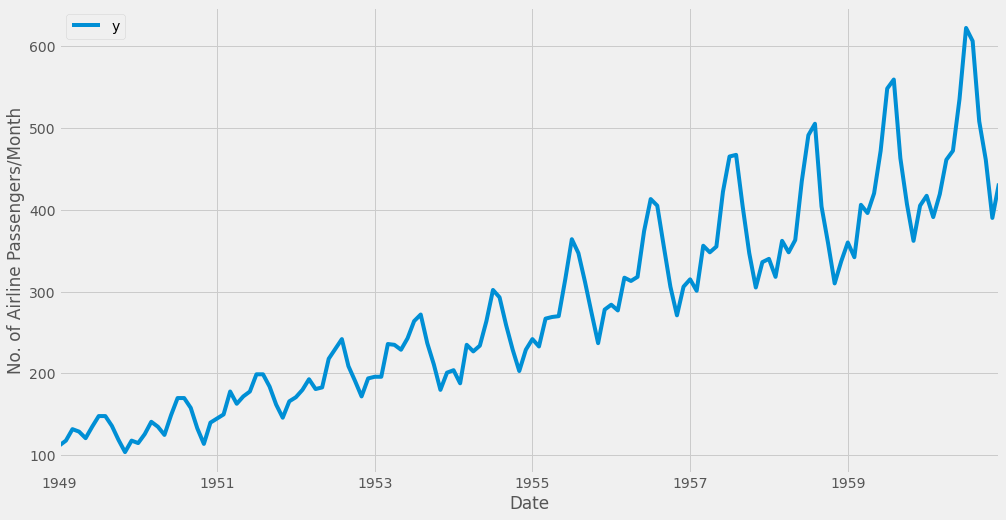

In [88]:
# Plot the timeseries 
pd.plotting.register_matplotlib_converters()
ax = ts.set_index('ds').plot(figsize=(15, 8))
ax.set_ylabel('No. of Airline Passengers/Month')
ax.set_xlabel('Date')
plt.show()

**Time Series Forecasting with Prophet** We will now learn how to use the `prophet` library to predict future values of our time series. The Facebook team has abstracted away many of the inherent complexities of time series forecasting and made it more intuitive for analysts and developers alike to work with time series data.

To begin, we will create a new prophet object with `Prophet()` and provide a number of arguments. For example, we can specify the desired range of our uncertainty interval by setting the `interval_width` parameter.

In [89]:
# Set the uncertainty interval to 95% (the Prophet default is 80%)
Model = Prophet(interval_width=0.95)

In [90]:
# Fit the timeseries to Model
Model.fit(ts)

14:00:59 - cmdstanpy - INFO - Chain [1] start processing
14:00:59 - cmdstanpy - INFO - Chain [1] done processing


In order to obtain forecasts of our time series, we must provide the model with a new dataframe containing a `ds` column that holds the dates for which we want predictions. Conveniently, we do not have to concern ourselves with manually creating this dataframe because prophet provides the `.make_future_dataframe()` helper method. We will call this function to generate 36 datestamps in the future.

It is also important to consider the frequency of our time series. Because we are working with monthly data, we clearly specified the desired frequency of the timestamps (in this case, MS is the start of the month). Therefore, the `.make_future_dataframe()` will generate 36 monthly timestamps for us. In other words, we are looking to predict future values of our time series 3 years into the future.

In [91]:
# Use make_future_dataframe() with a monthly frequency and periods = 36 for 3 years
future_dates = Model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


This future dates dataframe can now be used as input to the `.predict()` method of the fitted model.

In [92]:
# Predict the values for future dates and take the head of forecast
forecast = Model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662426,37.916823,126.845366,106.662426,106.662426,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,0.0,0.0,0.0,84.814159
1,1949-02-01,108.835452,34.038649,122.271097,108.835452,108.835452,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,0.0,0.0,0.0,78.227931
2,1949-03-01,110.798186,65.905019,154.948080,110.798186,110.798186,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,0.0,0.0,0.0,110.342237
3,1949-04-01,112.971212,64.508321,149.671301,112.971212,112.971212,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,0.0,0.0,0.0,107.810718
4,1949-05-01,115.074141,66.506665,155.825758,115.074141,115.074141,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,0.0,0.0,0.0,111.266255


We can see that Prophet returns a large table with many interesting columns, but we subset our output to the columns most relevant to forecasting, which are:

* `ds`: the datestamp of the forecasted value
* `yhat`: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)
* `yhat_lower`: the lower bound of our forecasts
* `yhat_upper`: the upper bound of our forecasts

In [93]:
# Subset above mentioned columns and view the tail 
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,649.848630,605.204964,693.907473
176,1963-09-01,602.344925,555.349438,645.693704
177,1963-10-01,566.285229,523.601125,611.894587
178,1963-11-01,534.334833,486.900051,576.425565
179,1963-12-01,563.989108,518.302649,606.701289


A variation in values from the output presented above is to be expected as Prophet relies on Markov chain Monte Carlo (MCMC) methods to generate its forecasts. MCMC is a stochastic process, so values will be slightly different each time.

Prophet also provides a convenient method to quickly plot the results of our forecasts.

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

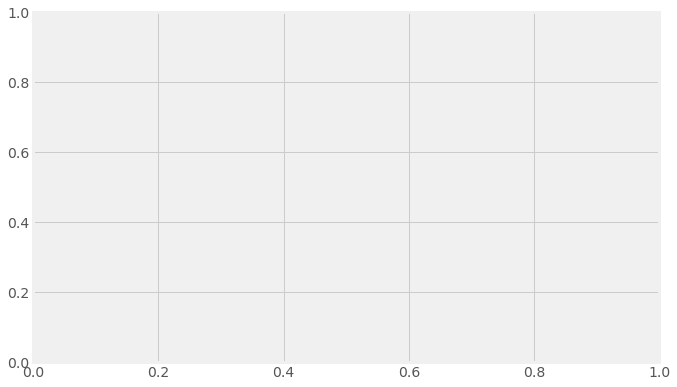

In [94]:
# Use Prophet's plot method to plot the predictions
Model.plot(forecast, uncertainty=True)
plt.show()

Prophet plots the observed values of the time series (the black dots), the forecasted values (blue line) and the uncertainty intervals of our forecasts (the blue shaded regions).

One other particularly strong feature of Prophet is its ability to return the components of our forecasts. This can help reveal how daily, weekly, and yearly patterns of the time series contribute to the overall forecasted values. We can use the `.plot_components()` method to view the individual components.

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

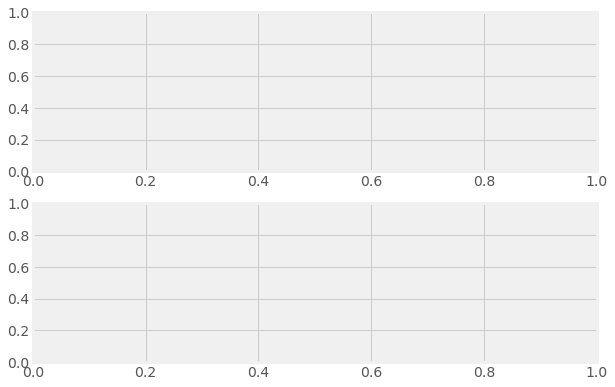

In [95]:
# Plot model components 
Model.plot_components(forecast)
plt.show()

Since we are working with monthly data, Prophet will plot the trend and the yearly seasonality but if you were working with daily data, you would also see a weekly seasonality plot included. 

From the trend and seasonality, we can see that the trend is playing a large part in the underlying time series and seasonality comes into play mostly toward the beginning and the end of the year. With this information, we've been able to quickly model and forecast some data to get a feel for what might be coming our way in the future from this particular dataset. 